Для увеличения выручки интернет-магазина необходимо приоритизировать гипотезы, сформулированные отделом маркетинга, провести А/В-тест и проанализировать результаты.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime as dt



## 1. Приоритизация гипотез.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_colwidth', 150)
df = pd.read_csv()
df.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


<hr style="border: 1px solid grey;" />

In [ ]:
# приводим названия колонок к нижнему регистру
df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]

1.1 Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [ ]:
# добавляем новый столбец 'ICE'
df['ICE'] = (df['impact']*df['confidence'])/df['efforts']
df.loc[: , ['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы с индексами 8, 0, 7

### 1.2 Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [ ]:
# добавляем новый столбец 'RICE'
df['RICE'] = (df['reach']*df['impact']*df['confidence'])/df['efforts']
df.loc[: , ['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По методу RICE наиболее перспективные гипотезы с индексами 7, 2, 0
 Приоритезация гипотез изменилась в следствии изменения метода. 

### 1.3 Вывод по приоритизации гипотез.

In [ ]:
# Выведем на экран столбцы 'hypothesis', 'ICE', 'RICE'
df.loc[: , ['hypothesis', 'ICE', 'RICE']].sort_values(by='RICE', ascending=False).round(2)

,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.0


Параметр охвата (Reach), использующийся в методе RICE изменил всю приоритетность, полученную по методу ICE, только 6 и 4 гипотезы остались на прежних местах.  

В нашем случае наиболее приоритетными гипотезами будут 7, 2, 0.

## 2. Анализ A/B-теста

In [ ]:
# Загрузим датафрейм orders и приведем данные в столбце 'date' к формату datetime
orders = pd.read_csv()
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
# Загрузим датафрейм visitors и приведем данные в столбце 'date' к формату datetime
visitors = pd.read_csv()
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
# датафрейм orders разделим на группы и выведем информацию о группах на экран
orders_group_a = orders[orders['group'] == 'A']
orders_group_b = orders[orders['group'] == 'B']
print(orders_group_a.info())
print(orders_group_b.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 2 to 1195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  557 non-null    int64         
 1   visitorId      557 non-null    int64         
 2   date           557 non-null    datetime64[ns]
 3   revenue        557 non-null    int64         
 4   group          557 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 26.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  640 non-null    int64         
 1   visitorId      640 non-null    int64         
 2   date           640 non-null    datetime64[ns]
 3   revenue        640 non-null    int64         
 4   group          640 non-null    object        
d

В группе "А" 557 строк, пропусков данных нет.  В группе "В" 640 строк, пропусков данных нет. Проверим присутствие одних и тех же пользователей в обоих группах.

In [ ]:
# В список group_a сохраним уникальные значения столбца visitorId
group_a = orders_group_a['visitorId'].unique()
orders_share = orders_group_b.query('visitorId in @group_a')  # сделаем срез  датафрейма orders_group_b по значениям столбца visitorId из списка group_a

57 пользователей попали в обе группы одновременно, удалим этих пользователей.

In [ ]:
#  в список orders_share_list сохраним уникальные значения из столбца visitorId датасета orders_share
orders_share_list = orders_share['visitorId'].unique()
# в датасете orders оставим только те данные, visitorId которых не входят в список orders_share_list
orders= orders.query(('visitorId not in @orders_share_list'))

В датасете orders осталось 1016 строк, все пользователи поделены на группы и в каждой группе уникальные пользователи. 
Датасет visitors тоже проверим.

In [ ]:
# датафрейм visitors разделим на группы и выведем информацию о группах на экран
visitors_group_a = visitors[visitors['group'] == 'A']
visitors_group_b = visitors[visitors['group'] == 'B']
print(visitors_group_a.info())
print(visitors_group_b.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      31 non-null     datetime64[ns]
 1   group     31 non-null     object        
 2   visitors  31 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 992.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 31 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      31 non-null     datetime64[ns]
 1   group     31 non-null     object        
 2   visitors  31 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 992.0+ bytes
None


В группах "А" и "В" датафрейма visitors одиноковое количество строк. Проверим пользователей в группах. 

In [ ]:
# В список visitors_a сохраним уникальные значения столбца visitors датасета visitors_group_a
visitors_a = visitors_group_a['visitors'].unique()
visitors_share = visitors_group_b.query('visitors in @visitors_a') # сделаем срез датасета visitors_group_b по значениям столбца visitors входящим в список visitors_a
visitors_share # выведем на экран полученный датасет

,date,group,visitors
39,2019-08-09,B,610
60,2019-08-30,B,490
61,2019-08-31,B,718


В датасете visitors 3 пользователя попали в обе группы. 

In [ ]:
#  в список visitors_share_list сохраним уникальные значения из столбца visitorId датасета orders_share
visitors_share_list = visitors_share['visitors'].unique()
# в датасете visitors оставим только те данные, visitorId которых не входят в список visitors_share_list
visitors= visitors.query(('visitors not in @visitors_share_list'))

### 2.1 Построим график кумулятивной выручки по группам.

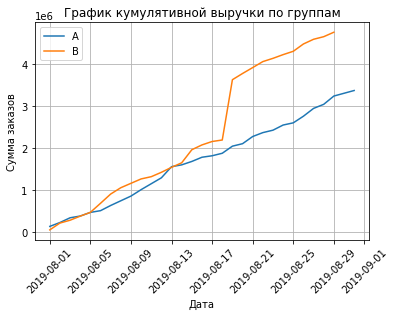

In [ ]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()
# Вычислим максимальную дату, найдём число уникальных ID заказов и пользователей, подсчитаем сумму средних чеков в датасете orders
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date': 'max', 'group': 'max', 'transactionId': 'nunique', 'visitorId': 'nunique', 'revenue': 'sum',}), axis=1,).sort_values(by=['date', 'group'])
# Вычислим максимальную дату, найдём число ID пользователей в датасете visitors
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице и изменяем названия столбцов
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
# датасет с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датасет с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.xticks(rotation=45)
plt.grid()
plt.title("График кумулятивной выручки по группам")
plt.xlabel("Дата")
plt.ylabel("Сумма заказов");


Выручка в группах увеличивается. В группе "В" резкое увеличение после 17 августа. Скорее всего один из покупателей совершил крупную покупку.

### 2.2 Построим график кумулятивного среднего чека по группам.

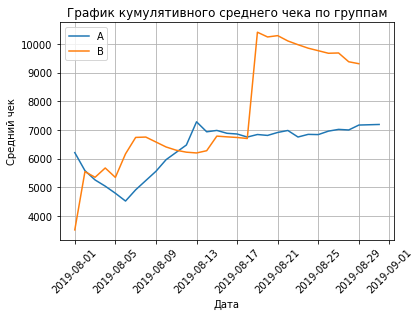

In [ ]:
# Строим график кумулятивного среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
# Строим график кумулятивного среднего чека группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.xticks(rotation=45)
plt.grid()
plt.title("График кумулятивного среднего чека по группам")
plt.xlabel("Дата")
plt.ylabel("Средний чек");

В графике кумулятивного среднего группы "В" также наблюдается резкое увеличение, сумма чека выросла значительно, а количество покупателей практически не увеличилось. После резкого увеличения кумулятивное среднего чека в группе "В" падает. В группе "А" кумулятивное среднего чека растет.

### 2.3 Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

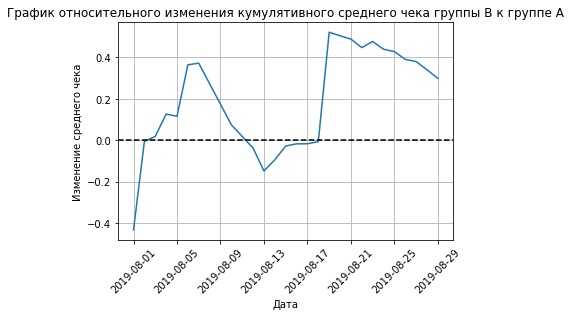

In [ ]:
# собираем данные в одном датасете и удаляем пропущенные значения
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']).dropna()

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=45)
plt.grid()
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.xlabel("Дата")
plt.ylabel("Изменение среднего чека");

В нескольких точках график различия резко меняется. Подтверждается наличие крупного заказа.


### 2.4 Построим график кумулятивной конверсии по группам.

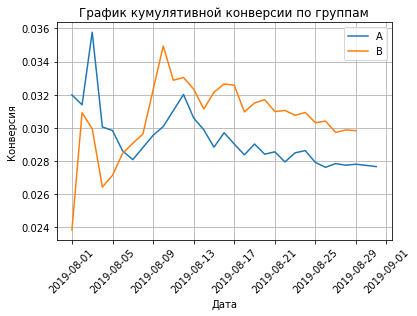

In [ ]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend() 
plt.xticks(rotation=45)
plt.grid()
plt.title("График кумулятивной конверсии по группам")
plt.xlabel("Дата")
plt.ylabel("Конверсия");



График группы "В" после 5 августа вырывается вверх, но постепенно снижается. График группы "А" снижается на всем своем протяжении.

### 2.5 Построим график относительного изменения кумулятивной конверсии группы B к группе A.

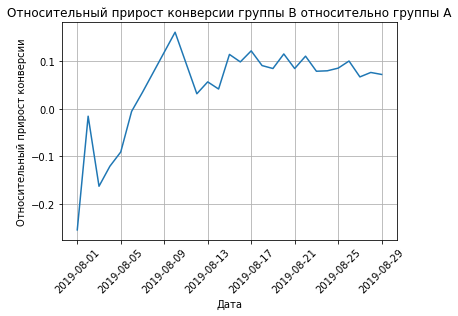

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']).dropna()
# строим график относительного изменения конверсии
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.xticks(rotation=45)
plt.grid()
plt.title("Относительный прирост конверсии группы B относительно группы A")
plt.xlabel("Дата")
plt.ylabel("Относительный прирост конверсии");

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд и там и осталась.

### 2.6 Построим точечный график количества заказов по пользователям.

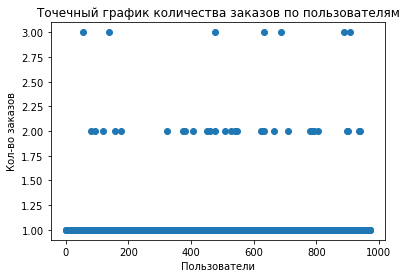

In [ ]:
# Подсчитаем количество заказов по пользователям и построим точечный график
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title("Точечный график количества заказов по пользователям")
plt.xlabel("Пользователи")
plt.ylabel("Кол-во заказов");

В основном пользватели делают 1 заказ, меньшее кол-во поьзователей делает 2 заказа, но их все же много. Есть пользователи, которые делают 3 заказа.

### 2.7 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [ ]:
# Методом np.percentile() найдем перцентили.
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 1. 2.]


99-му персентилю соотвествует значение 2, то есть больше 2 заказов сделали меньше 1% пользователей, 95-му персентилю соотвестует число 1, то есть больше 1 заказов совершили меньше 5% пользователей, 90-му персентилю также соотвестует число 1.

### 2.8 Построим точечный график стоимостей заказов.

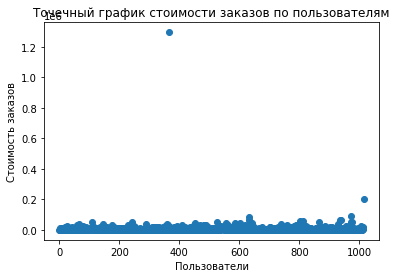

In [ ]:
# серия из чисел от 0 до количества наблюдений в orders
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])
plt.title("Точечный график стоимости заказов по пользователям")
plt.xlabel("Пользователи")
plt.ylabel("Стоимость заказов");

На графиках кумулятивного среднего чека по группам и относительного изменения кумулятивного среднего чека группы B к группе A 17 августа резкое увеличение значений, на точечном графике стоимостей заказов отчетливо виден выброс, искажающий график.

### 2.9 Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [ ]:
# Методом np.percentile() найдем перцентили.
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[17990. 26785. 53904.]


99-му персентилю соотвествует значение 53904, то есть стоимость заказа больше 53904 у 1% пользователей, 95-му персентилю соотвестует число 26785, то есть сумма заказа больше 26785 у 5% пользователей, 90-му персентилю соотвестует число 17900.

Аномалиями будем считать более одного заказа и заказы стоимостью более 27 тыс. 

### 2.10 Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Для расчета р-value, я решил использовать непараметрический тест Уилкоксона-Манна-Уитни, так как у нас имеются выбросы, а сам тест работает с рангами, не учитывая сами значения. Так же сформирую нулевую и альтернативную гипотезы.  
 Нулевая гипотеза H0: по «сырым» данным различий в конверсии групп A и B нет.  
 Альтернативная гипотеза Н1: по «сырым» данным конверсии групп A и B различаются.  
  Порогом статистической значимости установим alpha=.05

In [ ]:


visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1,)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1,)

visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False).agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))

ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1,).sort_values(by=['date'])

ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}), axis=1,).sort_values(by=['date'])

ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (ordersADaily.merge( ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders',),],axis=0,)

sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders',),],axis=0,)

print('\nОтносительный прирост конверсии группы B по отношению к группе A: {:.3f}'.format(sampleB.mean()/sampleA.mean()-1))
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)
print('P-value: {0:.5f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Конверсии групп различны')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')



Относительный прирост конверсии группы B по отношению к группе A: 0.159
P-value: 0.00571
Отвергаем нулевую гипотезу. Конверсии групп различны


### 2.11 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Нулевая гипотеза H0: по «сырым» данным различий в среднем чеке групп A и B нет.  
 Альтернативная гипотеза Н1: по «сырым» данным средние чеки групп A и B различаются.

In [ ]:
print('Относительное изменение среднего чека в группе B по отношению группы A: {:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('P-value: {0:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средние чеки групп по "сырым" данным различны')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

Относительное изменение среднего чека в группе B по отношению группы A: 0.287
P-value: 0.415
Не получилось отвергнуть нулевую гипотезу.


2.12 Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

По очищеным данным также используем тест Уилкоксона-Манна-Уитни.  
И сформулируем гипотезы.  
 Нулевая гипотеза H0: по «очищеным» данным различий в конверсии групп A и B нет.  
 Альтернативная гипотеза Н1: по «очищеным» данным конверсии групп A и B различаются.  
  Порогом статистической значимости установим alpha=.05

In [ ]:
# отфильтруем пользователей с количестовом заказов больше 1
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['userId'],],axis=0,)

usersWithExpensiveOrders = orders[orders['revenue'] > 27000]['visitorId']

abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())

# отфильтруем заказы свеше 27 тыс
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
        pd.Series( 0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders',),], axis=0,)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders',),], axis=0,)


print('\nОтносительный прирост конверсии группы B по отношению к группе A после очистки данных: {:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('P-value: {0:.5f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Конверсии групп по "очищеным" данным различны')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')


Относительный прирост конверсии группы B по отношению к группе A после очистки данных: 0.173
P-value: 0.00822
Отвергаем нулевую гипотезу. Конверсии групп по "очищеным" данным различны


### 2.13 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Нулевая гипотеза H0: по «очищеным» данным различий в среднем чеке групп A и B нет.  
 Альтернативная гипотеза Н1: по «очищеным» данным средние чеки групп A и B различаются.

In [ ]:
print('Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {:.3f}'.format(orders[
            np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()/ orders[np.logical_and(orders['group'] == 'A',
            np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()- 1))
results =stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'], orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)

print('P-value: {0:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.  Средние чеки в группах по "очищеным" данным различны')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.034
P-value: 0.364
Не получилось отвергнуть нулевую гипотезу.


### 2.14 Решение по результатам теста.

На основе полученных данных при проведении А/В-теста можно сделать вывод:  
Конверсии по группам различаются и по "сырым" и по "очищеным" данным.  
Средние чеки по группам одинаковы и по "сырым" и по "очищеным" данным.  
График различия конверсии между группами сообщает, что результаты группы B лучше группы A.  
График различия среднего чека говорит о том, что результаты группы B хоть и лучше результатов группы А, но они ухудшаются.  
 Исходя из имеющихся данных тест можно остановить и зафиксировать победу группы В.

## 3 Общий вывод

Отделу маркетинга можно обратить внимание на гипотезы:  
    Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  
    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа  
    Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
    
    
Взять за основу своих дальнейших действий стратегию примененую к группе В.